<a href="https://colab.research.google.com/github/shielamms/AI-and-Data-Analysis/blob/master/Matplotlib_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Basic Matplotlib Exercises**
###### Notebook written by Shiela Sandoval




#####  This notebook contains Python matplotlib visualizations for a simple sales dataset.
---


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np

### **Getting the data**

We'll use a publicly available dataset of Company Sales in CSV format. The file can be downloaded from [this link](https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv).

After downloading the file, you can programmatically upload it into the notebook through Colab's *files* module. This provides us with an upload button to import the file from our local drive into our Colab notebook. We can then use the io module to open the uploaded file and let pandas process the CSV data into a dataframe.

In [ ]:
from google.colab import files 
  
uploaded = files.upload()

Saving company_sales_data.csv to company_sales_data.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['company_sales_data.csv']))

We can see that our dataset is pretty simple: 12 rows corresponding to total sales per product for 12 months. There are 6 products: facecream, facewash, toothpaste, bathingsoap, shampoo, and moisturizer. The last 2 columns are the total number of units sold and the total profit for that month.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes


describe() gives us statistical properties that might be useful in the visualization, like the minimum and maximum values of product sales.

In [ ]:
data.describe()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000
mean,6.500000,2873.333333,1542.916667,5825.833333,9500.833333,2117.500000,1542.916667,26027.50000,260275.000000
std,3.605551,584.595172,316.733745,1242.032486,2348.095779,617.724931,316.733745,7014.36594,70143.659404
min,1.000000,1990.000000,1120.000000,4550.000000,6100.000000,1200.000000,1120.000000,18330.00000,183300.000000
25%,3.750000,2460.000000,1305.000000,4862.500000,8015.000000,1795.000000,1305.000000,21065.00000,210650.000000
50%,6.500000,2830.000000,1527.500000,5530.000000,9090.000000,1995.000000,1527.500000,22935.00000,229350.000000
75%,9.250000,3435.000000,1765.000000,6400.000000,10045.000000,2325.000000,1765.000000,29667.50000,296675.000000
max,12.000000,3700.000000,2100.000000,8300.000000,14400.000000,3550.000000,2100.000000,41280.00000,412800.000000


### **Plotting the total profit per month**

Perhaps one of the first things that come to mind when you have data about monthly sales is to get the summary of profits (at least in a business perspective). Incidentally, this also gives us the simplest visualization - close to default, in fact - a line graph containing the summary of profits per month over the entire period.

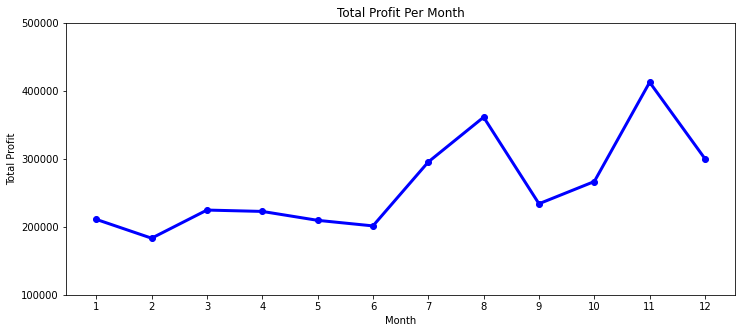

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(data['month_number'], data['total_profit'], color='b', linewidth=3, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Profit')

plt.xticks(data['month_number'])
plt.yticks(np.arange(100000, 600000, 100000))

plt.title('Total Profit Per Month')
plt.show()

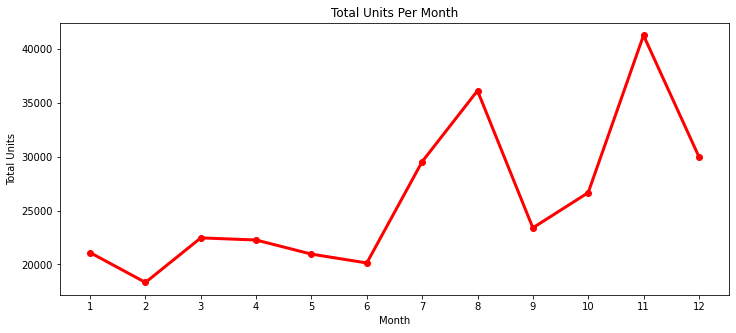

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(data['month_number'], data['total_units'], color='r', linewidth=3, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Units')

plt.xticks(data['month_number'])
# plt.yticks(np.arange(100000, 600000, 100000))

plt.title('Total Units Per Month')
plt.show()

**What I can tell from this graph:** Sales are highest in the months of July, August, November, and December. This could indicate that more people buy the products during summer time and around the Christmas holidays.

So, the next question is: which products are the most popular during particular months?

### **Plotting the sales per product per month**

From the summary, we then explore a level deeper and take into account the product type. We can plot the monthly sales of all products into a single figure.

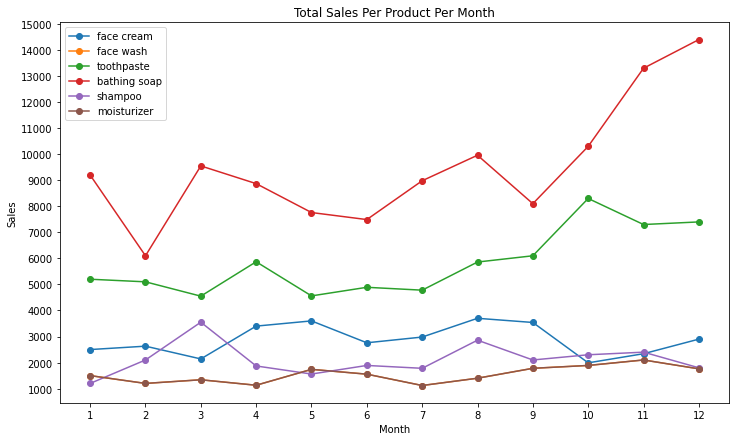

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(data['month_number'], data['facecream'], marker='o', label='face cream')
plt.plot(data['month_number'], data['facewash'], marker='o', label='face wash')
plt.plot(data['month_number'], data['toothpaste'], marker='o', label='toothpaste')
plt.plot(data['month_number'], data['bathingsoap'], marker='o', label='bathing soap')
plt.plot(data['month_number'], data['shampoo'], marker='o', label='shampoo')
plt.plot(data['month_number'], data['moisturizer'], marker='o', label='moisturizer')

plt.xticks(data['month_number'])
plt.yticks(np.arange(1000, 16000, 1000))

plt.xlabel('Month')
plt.ylabel('Sales')

plt.legend(loc='upper left')
plt.title('Total Sales Per Product Per Month')

plt.show()

**What I can tell from this graph:** The most popular (or should we say profitable) products are bathing soap and toothpaste, in that order. Profits from these two products do increase from July until the end of the year. The profit trend for the rest of the products do not seem to rise drastically at any given month. This indicates that the bathing soap and toothpaste are the major contributors to our initial observation that total profits increase during summer time and Christmas time.

### **Plot of toothpaste sales data over 12 months**


Rather than using matplotlib's default plot type, which is a line plot, we can also use scatter() to visualize the distribution of datapoints for a certain product. Here, we'll check the distribution of toothpaste product sales over the 12-month period.

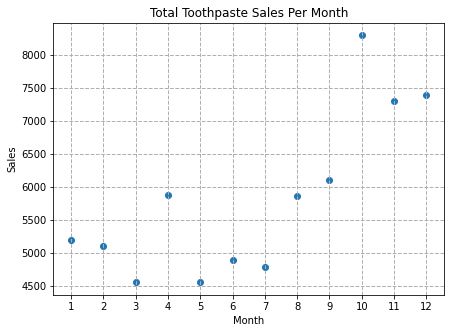

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(data['month_number'], data['toothpaste'])

plt.xticks(data['month_number'])

plt.xlabel('Month')
plt.ylabel('Sales')

plt.grid(True, linewidth=1, linestyle='--')
plt.title('Total Toothpaste Sales Per Month')

plt.show()

### **Using multiple plots**

First, let's take a look at how to create 2x1 subplots (or 2 rows and 1 column).

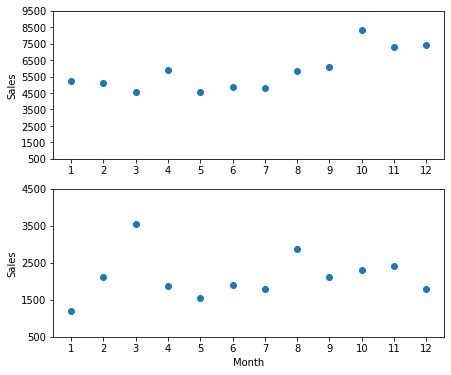

In [ ]:
fig, ax = plt.subplots(2, 1)

fig.set_size_inches(7, 6)

ax[0].scatter(data['month_number'], data['toothpaste'])
ax[0].set_xticks(data['month_number'])
ax[0].set_yticks(np.arange(500, 9501, 1000))
ax[0].set_ylabel('Sales')

ax[1].scatter(data['month_number'], data['shampoo'])
ax[1].set_xticks(data['month_number'])
ax[1].set_yticks(np.arange(500, 4501, 1000))
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Sales')

plt.show()

If we added more columns, we would have to index the ax variable a bit differently.

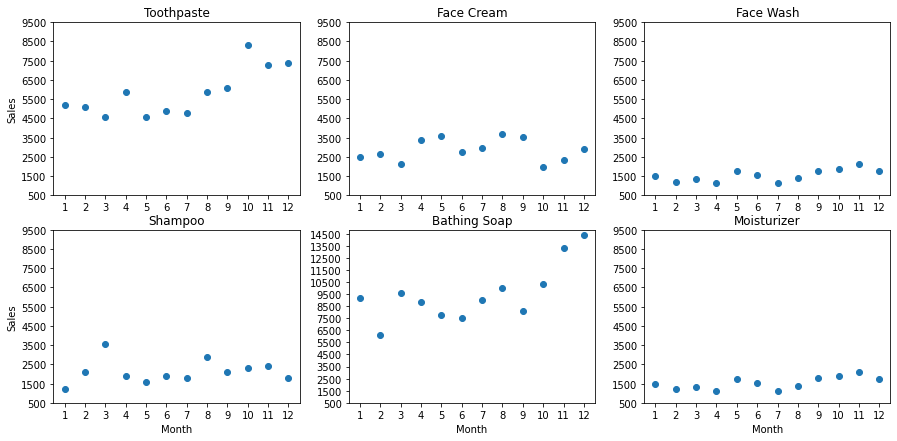

In [ ]:
fig, ax = plt.subplots(2, 3)

fig.set_size_inches(15, 7)

# First row
ax[0][0].scatter(data['month_number'], data['toothpaste'])
ax[0][0].set_xticks(data['month_number'])
ax[0][0].set_yticks(np.arange(500, 9501, 1000))
ax[0][0].set_ylabel('Sales')
ax[0][0].set_title('Toothpaste')

ax[0][1].scatter(data['month_number'], data['facecream'])
ax[0][1].set_xticks(data['month_number'])
ax[0][1].set_yticks(np.arange(500, 9501, 1000))
ax[0][1].set_title('Face Cream')

ax[0][2].scatter(data['month_number'], data['facewash'])
ax[0][2].set_xticks(data['month_number'])
ax[0][2].set_yticks(np.arange(500, 9501, 1000))
ax[0][2].set_title('Face Wash')

# Second row
ax[1][0].scatter(data['month_number'], data['shampoo'])
ax[1][0].set_xticks(data['month_number'])
ax[1][0].set_yticks(np.arange(500, 9501, 1000))
ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Sales')
ax[1][0].set_title('Shampoo')

ax[1][1].scatter(data['month_number'], data['bathingsoap'])
ax[1][1].set_xticks(data['month_number'])
ax[1][1].set_yticks(np.arange(500, 15000, 1000))
ax[1][1].set_xlabel('Month')
ax[1][1].set_title('Bathing Soap')

ax[1][2].scatter(data['month_number'], data['moisturizer'])
ax[1][2].set_xticks(data['month_number'])
ax[1][2].set_yticks(np.arange(500, 9501, 1000))
ax[1][2].set_xlabel('Month')
ax[1][2].set_title('Moisturizer')

plt.show()

Similarly, we can plot each product's data distribution in a single figure, as shown below. Some words of caution: if there are too many features in a single scatter plot, and if the data points are too spread apart, it might not be a good idea visually to put all the datasets into a single figure.

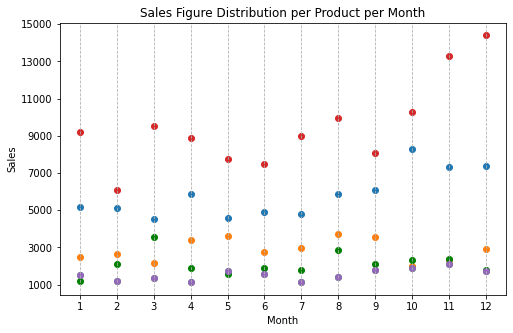

In [ ]:
plt.figure(figsize=(8,5))

plt.xticks(data['month_number'])
plt.yticks(np.arange(1000, 16000, 2000))

plt.scatter(data['month_number'], data['toothpaste'])
plt.scatter(data['month_number'], data['facecream'])
plt.scatter(data['month_number'], data['facewash'])
plt.scatter(data['month_number'], data['shampoo'], color='green')
plt.scatter(data['month_number'], data['bathingsoap'])
plt.scatter(data['month_number'], data['moisturizer'])

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Distribution per Product per Month')
plt.grid(True, axis='x', linestyle='--')

plt.show()

The scatter plots above can give us picture of the data distribution of each product. Alternatively, we can plot the statistical properties of each product by using a boxplot, which gives us the median, minimum, maximum, and the outlier values in the dataset.

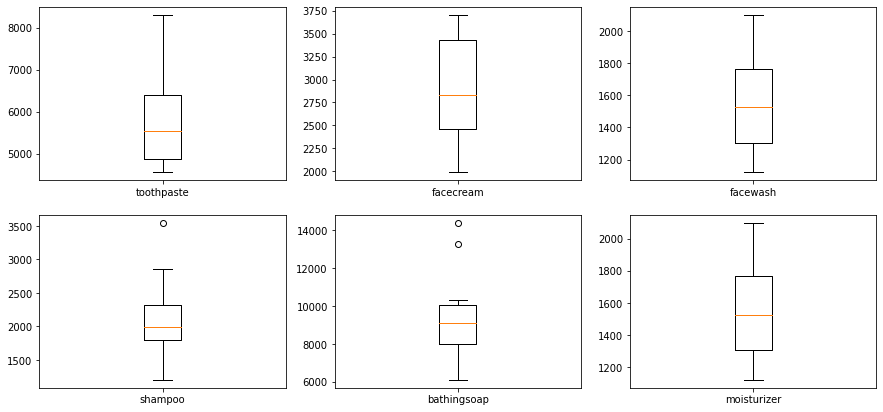

In [ ]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 7)

ax[0][0].boxplot(data['toothpaste'])
ax[0][0].set_xticklabels(['toothpaste'])

ax[0][1].boxplot(data['facecream'])
ax[0][1].set_xticklabels(['facecream'])

ax[0][2].boxplot(data['facewash'])
ax[0][2].set_xticklabels(['facewash'])

ax[1][0].boxplot(data['shampoo'])
ax[1][0].set_xticklabels(['shampoo'])

ax[1][1].boxplot(data['bathingsoap'])
ax[1][1].set_xticklabels(['bathingsoap'])

ax[1][2].boxplot(data['moisturizer'])
ax[1][2].set_xticklabels(['moisturizer'])

plt.show()

### **Comparing data using bar plot**

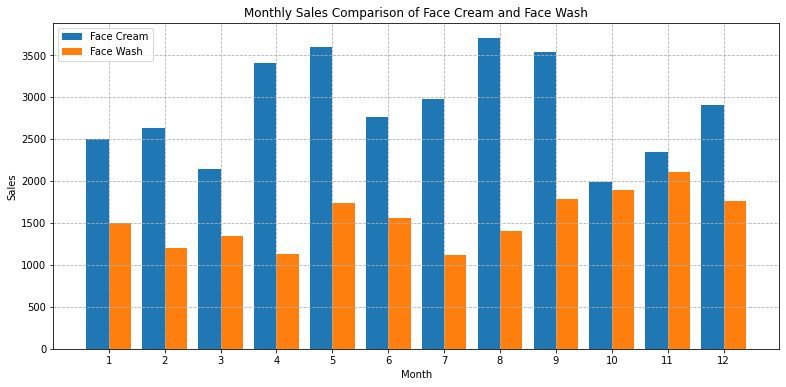

In [ ]:
plt.figure(figsize=(13, 6))

plt.xticks(data['month_number'])

bar_width = 0.4

# x - bar_width / 2 means to divide the allocated space for each point in the x-axis by two,
# wherein the left half will be for the bar plot of Face Cream, and the right half for the bar plot of Face Wash
plt.bar(data['month_number']-bar_width/2, data['facecream'], width=bar_width, label='Face Cream')
plt.bar(data['month_number']+bar_width/2, data['facewash'], width=-bar_width, label='Face Wash')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Comparison of Face Cream and Face Wash')

plt.legend(loc='upper left')
plt.grid(True, linestyle='--')

plt.show()

### **Using a stacked bar plot**

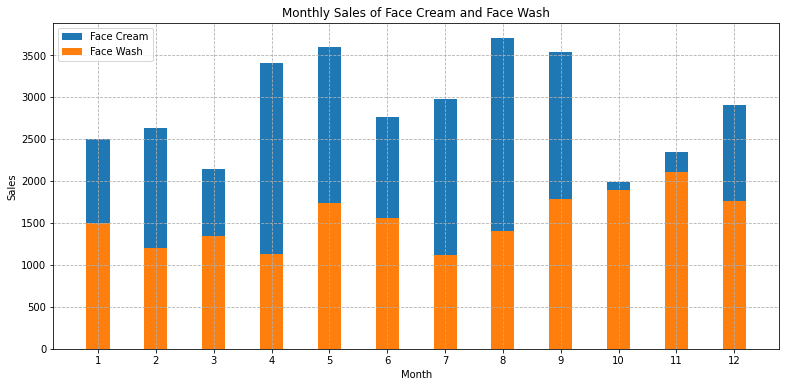

In [ ]:
fig, ax = plt.subplots()

fig.set_size_inches(13,6)
ax.set_xticks(data['month_number'])

bar_width = 0.4

ax.bar(data['month_number'], data['facecream'], width=bar_width, label='Face Cream')
ax.bar(data['month_number'], data['facewash'], width=-bar_width, label='Face Wash')

ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales of Face Cream and Face Wash')

ax.legend(loc='upper left')
ax.grid(True, linestyle='--')

plt.show()

### **PLotting a pie chart**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


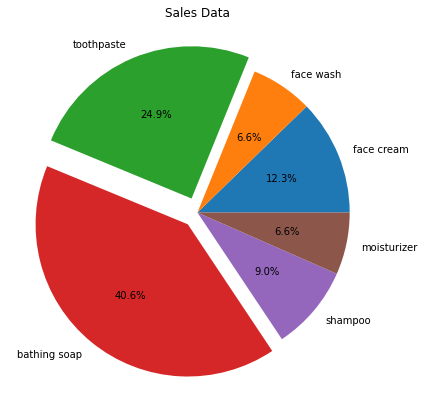

In [ ]:
plt.figure(figsize=(7,7))
labels = ['face cream', 'face wash', 'toothpaste', 'bathing soap', 'shampoo', 'moisturizer']

facecream_total = data[['facecream']].sum()
facewash_total = data[['facewash']].sum()
toothpaste_total = data[['toothpaste']].sum()
bathingsoap_total = data[['bathingsoap']].sum()
shampoo_total = data[['shampoo']].sum()
moisturizer_total = data[['moisturizer']].sum()

# add 'explode' just for fun
plt.pie([facecream_total, facewash_total, toothpaste_total, bathingsoap_total, shampoo_total, moisturizer_total], 
        labels=labels, autopct='%1.1f%%', explode=(0, 0, 0.1, 0.1, 0, 0))

plt.title('Sales Data')
plt.show()